In [20]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import imageio


In [2]:
microbusiness_data = pd.read_csv('inputs/train.csv')

In [3]:
# counties_shapefile = gpd.read_file('inputs/shape_files/tl_2019_us_county.shp')

# counties_shapefile.GEOID = counties_shapefile.GEOID.astype(int).nunique()
# counties_shapefile["cfips"] = (counties_shapefile["STATEFP"] + counties_shapefile["COUNTYFP"]).astype(int)

# merged_data = counties_shapefile.merge(microbusiness_data, left_on='cfips', right_on='cfips', how='outer')

# filtered_columns = (merged_data.isna().any(axis=0) == False).index

# merged_data = merged_data[filtered_columns]

# merged_data.head()

# merged_data.isna().any(axis=0)

### Clustering using DBSCAN algorithm

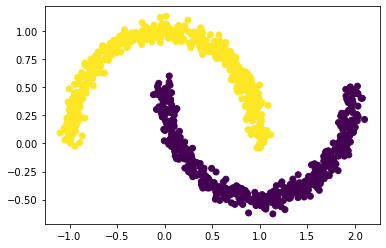

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_moons(n_samples=1000, noise=0.05)

# Run DBSCAN algorithm
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()

In [5]:
data = []

cfips = microbusiness_data.cfips.unique()

for cfip in cfips: 
    county_mbd = microbusiness_data[ microbusiness_data.cfips == cfip ].microbusiness_density.values 
    data.append(county_mbd)

data = np.array(data)

In [6]:
from scipy.signal import savgol_filter

In [7]:
# Run DBSCAN algorithm
data2 = savgol_filter(data, window_length=5, polyorder=1)
dbscan = DBSCAN(eps=1, min_samples=3)
labels = dbscan.fit_predict(data2)

result = {}

for label in labels: 
    if label in result: 
        result[label] += 1
    else: 
        result[label] = 1 
result


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
for label in result: 
    if label == -1 or label == 0 : 
        continue 
    tmp = data2[labels == label]
    legends = cfips[labels == label]
    for legend,row in zip(legends,tmp): 
        plt.plot(row,label=legend)
    legend = plt.legend(bbox_to_anchor=(1.3,1),)
    legend.set_title("cfips")
    plt.show()

In [8]:
legends = cfips[labels == 0]
tmp = data2[labels == 0]
l = 10
for legend,row in zip(legends[:l],tmp[:l]): 
    plt.plot(row,label=legend)
# plt.legend(bbox_to_anchor=(1.3,1))
plt.title("")
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 3135 but corresponding boolean dimension is 1000

In [9]:
filtered = np.std(data2,axis=1)**2 < 0.02
sum(filtered)

1787

In [52]:
sum( labels == 0 )

2527

In [53]:
a, b, c , d= sum( ( labels == 4 ) & filtered ) , sum( ( labels == -1 ) & filtered ) , sum( ( labels == 0 ) & filtered ) , sum( ( labels == 1 ) & filtered ) 
a,b,c,d, a+b+c+d, 

(10, 17, 1756, 4, 1787)

In [54]:
# np.max(np.std(data2[labels==0],axis=1))

In [55]:
tmp = data2[labels==0]
absolute_diff = [max(row) - min(row) for row in tmp]
# sorted(absolute_diff,reverse=True)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

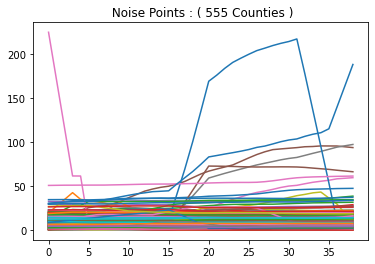

In [73]:
label = -1
tmp = data2[labels == label]
legends = cfips[labels == label]
for legend,row in zip(legends,tmp): 
    plt.plot(row,label=legend)
# legend = plt.legend(bbox_to_anchor=(1.3,1),)
# legend.set_title("cfips")
plt.title(f" Noise Points : ( {len(tmp)} Counties )")
plt.show()

In [61]:
result

{0: 2527, 4: 26, -1: 555, 1: 13, 2: 3, 3: 4, 5: 4, 6: 3}

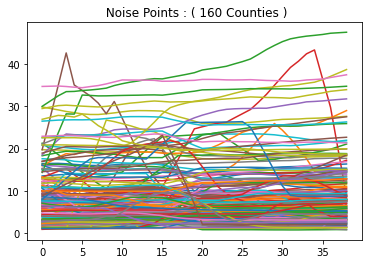

In [62]:
bool_1 = np.std(data2,axis=1) > 0.7
bool_2 = np.any((data2 > 50),axis=1)
label = -1
tmp = data2[bool_1 & ~bool_2]
for row in tmp: 
    plt.plot(row)
# legend = plt.legend(bbox_to_anchor=(1.3,1),)
# legend.set_title("cfips")
plt.title(f" Noise Points : ( {len(tmp)} Counties )")
plt.show()

In [63]:
time_labels = pd.to_datetime(microbusiness_data["first_day_of_month"]).unique()
time_labels

array(['2019-08-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2019-10-01T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2020-02-01T00:00:00.000000000', '2020-03-01T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000', '2020-05-01T00:00:00.000000000',
       '2020-06-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
       '2020-08-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2020-10-01T00:00:00.000000000', '2020-11-01T00:00:00.000000000',
       '2020-12-01T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-02-01T00:00:00.000000000', '2021-03-01T00:00:00.000000000',
       '2021-04-01T00:00:00.000000000', '2021-05-01T00:00:00.000000000',
       '2021-06-01T00:00:00.000000000', '2021-07-01T00:00:00.000000000',
       '2021-08-01T00:00:00.000000000', '2021-09-01T00:00:00.000000000',
       '2021-10-01T00:00:00.000000000', '2021-11-01

In [64]:
np.sum(labels == -1 )

555

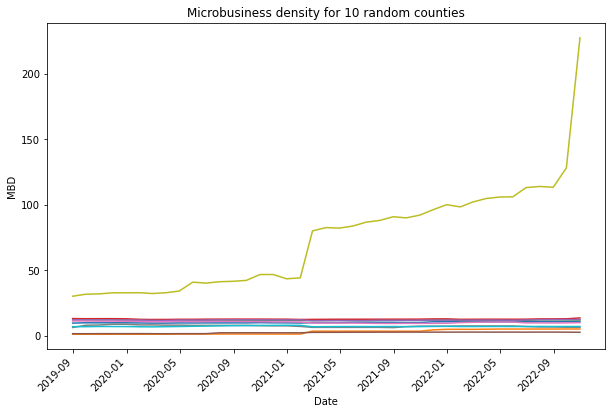

In [65]:
chosen_cfips = np.random.choice(cfips[labels == -1],10)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))
for cfip in chosen_cfips:
    dates = pd.date_range(start='2019-08-01', end='2022-11-01', freq='M')
    dates
    values = microbusiness_data[microbusiness_data.cfips == cfip]["microbusiness_density"].values


    # Plot the line
    ax.plot(dates, values)

    # Set the axis labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('MBD')
    ax.set_title('Microbusiness density for 10 random counties')

# Rotate the x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()

In [66]:
microbusiness_data


,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100


In [26]:
dates = pd.date_range(start='2019-07-30', end='2022-12-01', freq='MS')


In [27]:
dates

DatetimeIndex(['2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01'],
              dtype='datetime64[ns]', freq='MS')

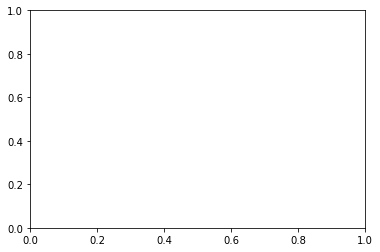

In [28]:
fig, ax = plt.subplots()
images = []
microbusiness_data = pd.read_csv('outputs/mbd_data.csv')

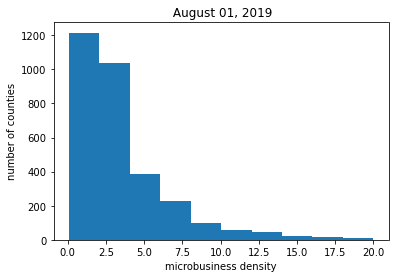

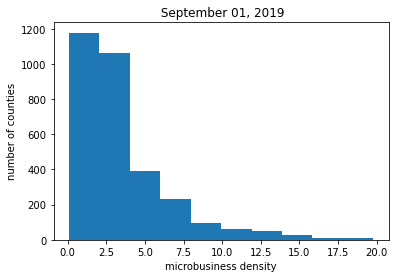

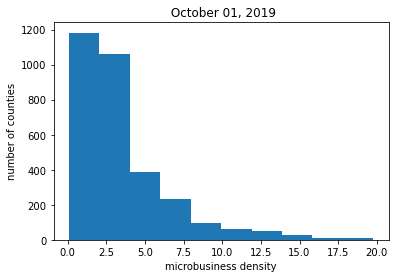

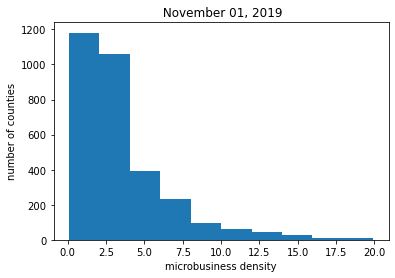

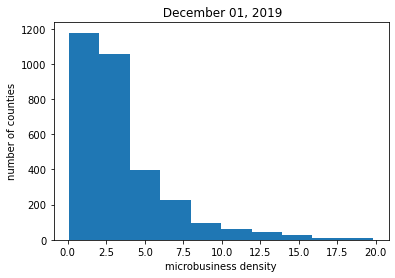

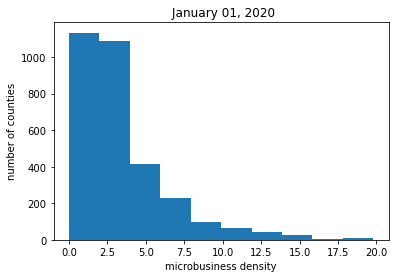

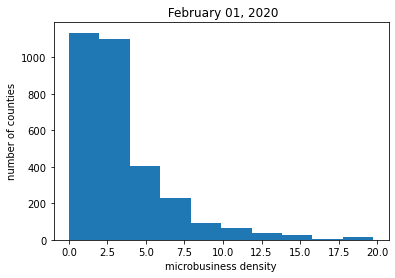

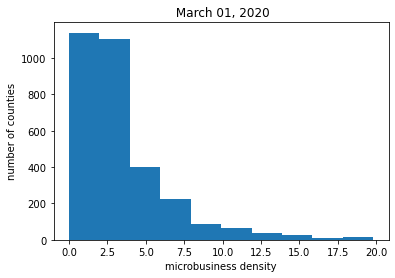

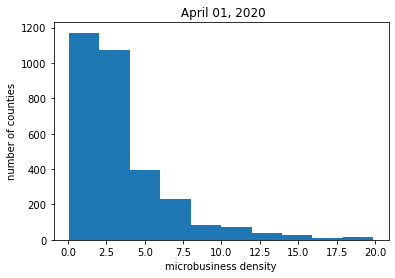

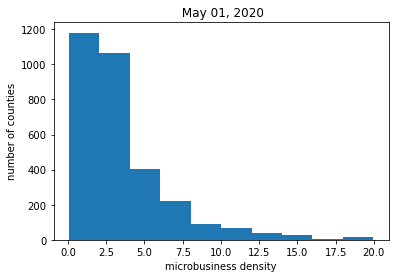

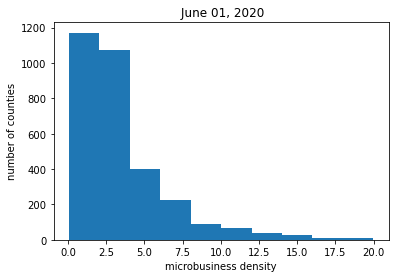

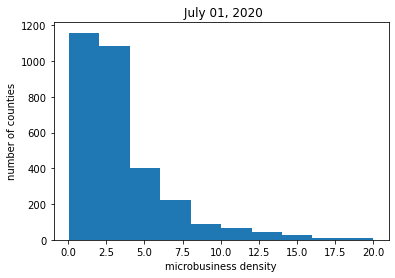

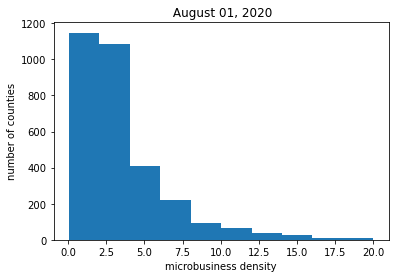

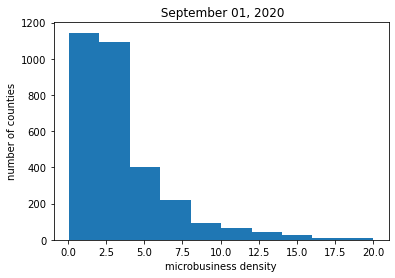

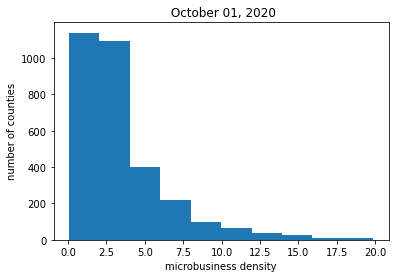

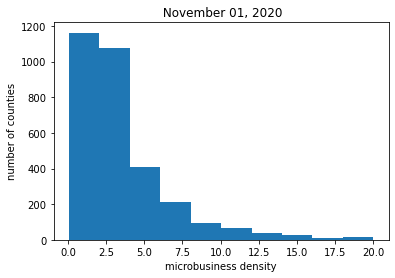

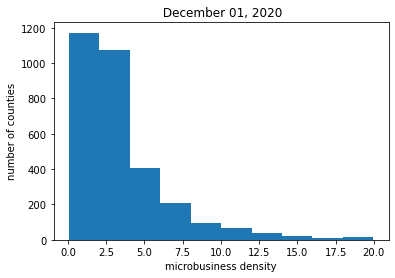

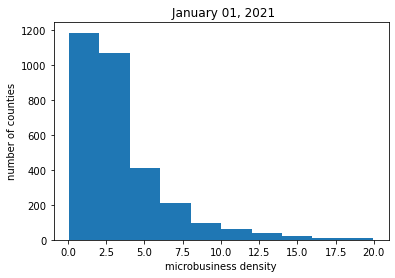

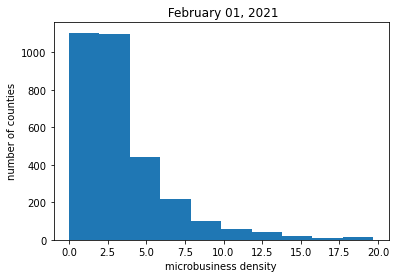

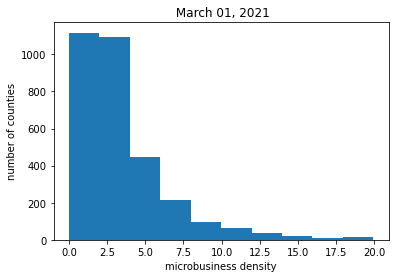

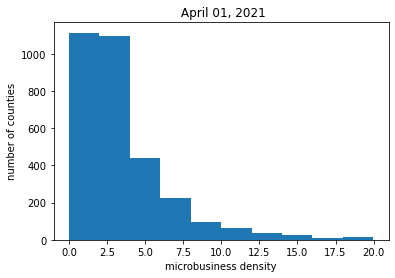

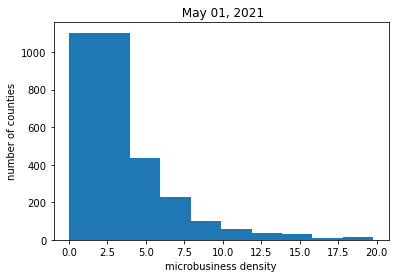

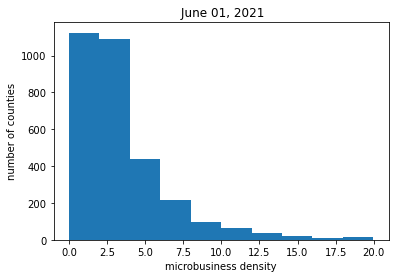

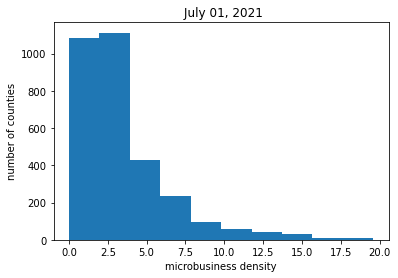

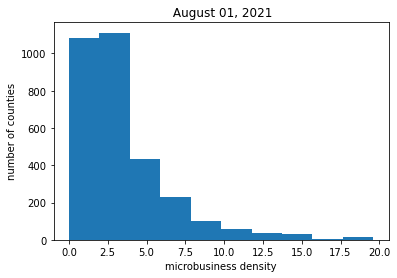

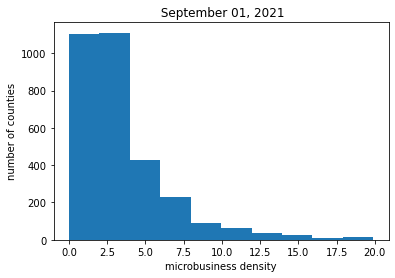

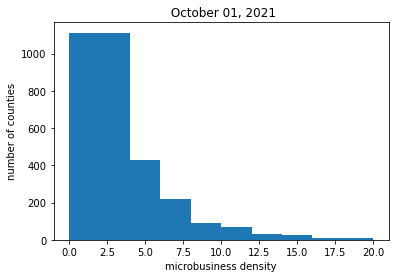

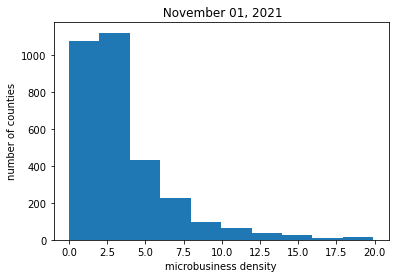

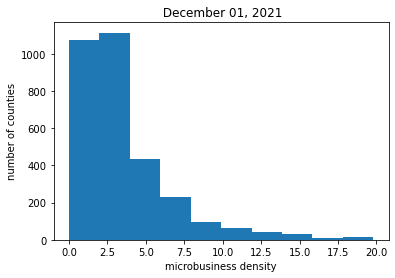

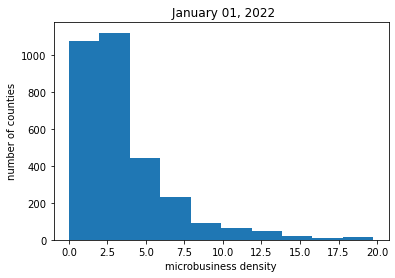

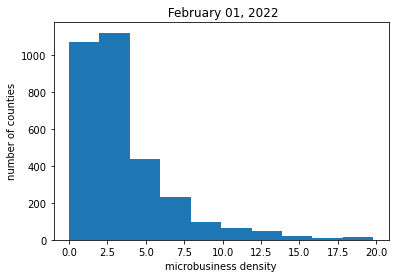

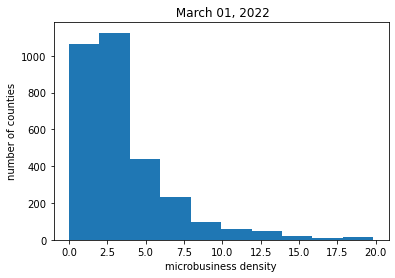

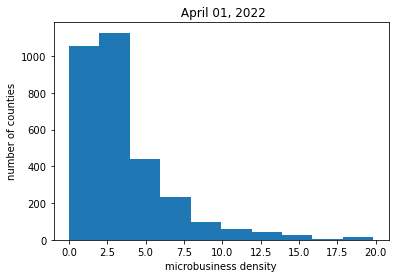

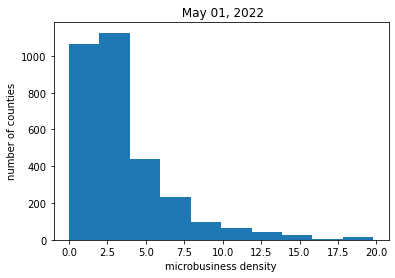

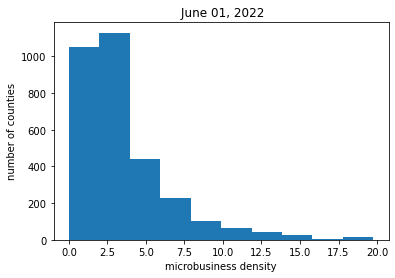

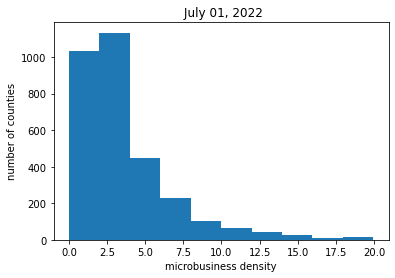

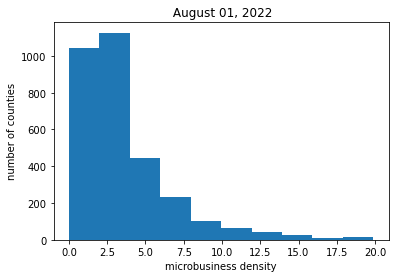

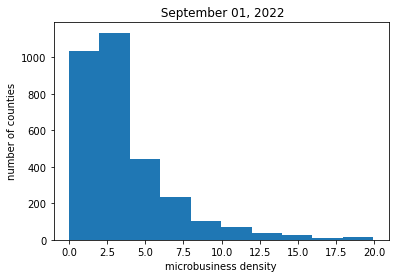

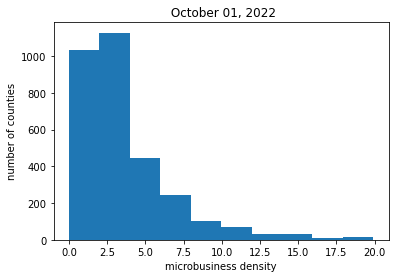

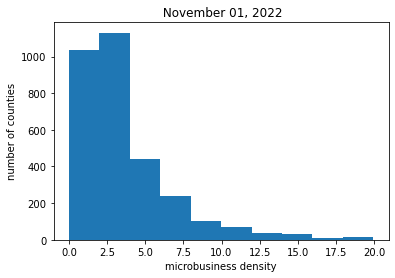

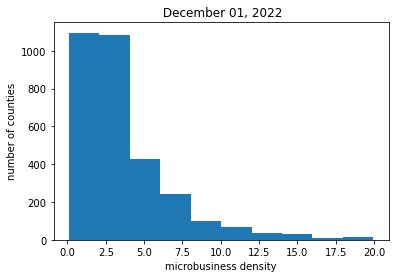

In [30]:
avg_mbd_data = []
for index,date in enumerate(dates):
    mbd_date_data = microbusiness_data[ microbusiness_data["first_day_of_month"] == str(date.date())].microbusiness_density
    mbd_date_data = mbd_date_data[ mbd_date_data < 20]
    plt.hist(mbd_date_data.values,bins=10)
    avg_mbd_data.append(np.mean(mbd_date_data.values))
    plt.title(f' {date.strftime("%B %d, %Y")}')
    plt.xlabel("microbusiness density")
    plt.ylabel("number of counties")
    plt.savefig(f"./images/mbd_gif/fig_{index}")
    plt.show()

In [70]:
max(mbd_date_data)

ValueError: max() arg is an empty sequence

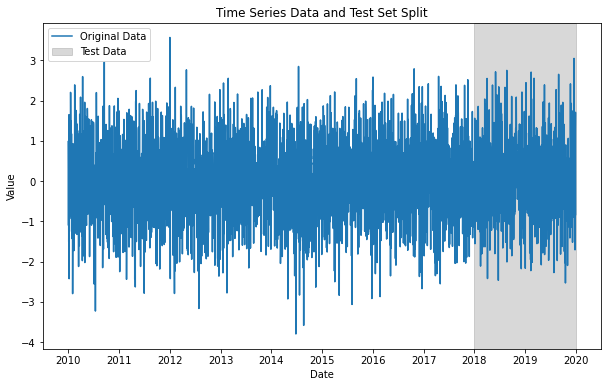

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate random time series data
np.random.seed(123)
dates = pd.date_range(start='2010-01-01', end='2019-12-31', freq='D')
data = pd.Series(np.random.randn(len(dates)), index=dates)

# Split data into training and test sets
train_data = data.loc['2010-01-01':'2017-12-31']
test_data = data.loc['2018-01-01':]

# Plot the time series data and split
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data.index, data.values, label='Original Data')
ax.axvspan('2018-01-01', data.index[-1], alpha=0.3, color='grey', label='Test Data')
ax.legend()
plt.title('Time Series Data and Test Set Split')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


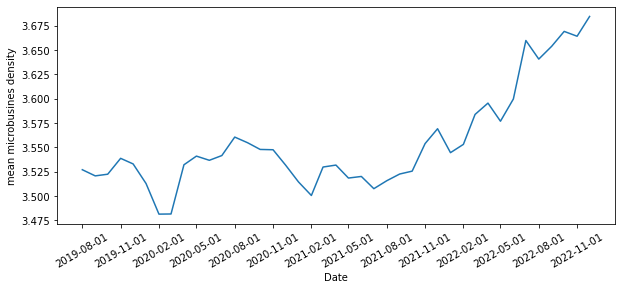

In [46]:
plt.figure(figsize=(10,4))
plt.plot(dates,avg_mbd_data)
plt.xticks(dates[::3],rotation=30)
plt.xlabel("Date")
plt.ylabel("mean microbusines density")
plt.show()

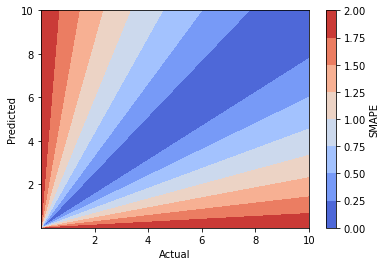

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Define the SMAPE function
def smape(actual, predicted):
    return np.mean(2 * np.abs(actual - predicted) / (np.abs(actual) + np.abs(predicted))) * 100

# Generate a grid of actual and predicted values
actual = np.linspace(0.0001, 10, 1000)
predicted = np.linspace(0.01, 10, 1000)
X, Y = np.meshgrid(actual, predicted)

# Calculate the SMAPE values for each combination of actual and predicted values
Z = np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        Z[i,j] = smape(X[i,j], Y[i,j])

Z = Z/100
# Create a contour plot of the SMAPE values
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, Z, cmap='coolwarm')
cbar = fig.colorbar(cs)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
cbar.ax.set_ylabel('SMAPE')
# ax.set_title('Contour Plot of SMAPE Values')
plt.show()


C:\Users\Owner\AppData\Local\Temp/ipykernel_42776/2708479803.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.mean(numerator / denominator) * 100


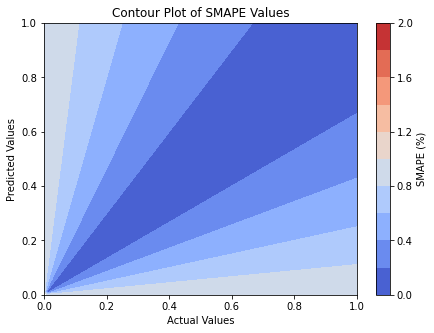

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def smape(actual, predicted):
    numerator = np.abs(actual - predicted)
    denominator = (np.abs(actual) + np.abs(predicted)) / 2
    return np.mean(numerator / denominator) * 100

# Create a grid of values for the actual and predicted arrays
actual_values = np.linspace(0, 1, 101)
predicted_values = np.linspace(0, 1, 101)

# Calculate the SMAPE values for each combination of actual and predicted values
smape_values = np.zeros((len(actual_values), len(predicted_values)))
for i in range(len(actual_values)):
    for j in range(len(predicted_values)):
        smape_values[i, j] = smape(actual_values[i], predicted_values[j])

# Create a contour plot of the SMAPE values
fig, ax = plt.subplots(figsize=(7, 5))
contour_levels = np.linspace(0, 200, 11)
contour = ax.contourf(actual_values, predicted_values, smape_values/200, levels=contour_levels/100, cmap='coolwarm')
cbar = plt.colorbar(contour)
cbar.ax.set_ylabel('SMAPE (%)')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
plt.show()
